# Workshop 3: Unsupervised Machine Learning

This workshop will go through an introduction to unsupervised machine learning applied to clustering and dimensionality reduction in python

We will start off working with the Nanoparticle dataset from Yousfan et al.

These notebooks can be run in two ways:
- On your own computer/laptop
- Using google colab:https://colab.research.google.com

This is because the computers in room 222 do not have umap installed and we arent able to get around this.

In [3]:
## The below code installs umap - run it once before the rest of the notebook:

!pip install umap-learn

In [1]:
import pandas as pd

# If using your own computer:
# Load the pharmaceutics dataset (update the file path as needed)
df = pd.read_excel("./Nanoparticle_braindelivery_data.xlsx")

In [4]:
## Check the shape of the data
print(df.shape)

(133, 15)


In [5]:
## Do a quick description of the data
print(df.describe())

           Weight        logP  Solubility  DrugCarrierRatio        Size  \
count  133.000000  133.000000  133.000000        133.000000  133.000000   
mean   319.045544    2.769361    0.159267          0.284526  147.688120   
std     92.970825    1.238233    0.220841          0.343883   71.730265   
min    146.143000   -2.560000    0.000000          0.007000   19.000000   
25%    243.301000    1.910000    0.008000          0.100000   97.360000   
50%    315.027000    2.930000    0.071000          0.100000  150.200000   
75%    368.380000    3.620000    0.166000          0.300000  189.000000   
max    853.906000    5.210000    1.000000          2.000000  400.000000   

             Zeta        Cmax         AUC        Tmax     Release  
count  133.000000  133.000000  133.000000  133.000000  133.000000  
mean    -8.941429    1.112105    1.142068    2.257331    5.277248  
std     25.376764    1.075297    1.132456    2.285802    5.859029  
min    -76.000000    0.008000    0.010000    0.02800

In [6]:
df.head()

,Weight,logP,Solubility,Pgp,DrugCarrierRatio,Position,Comp1,Comp2,Size,Zeta,Cmax,AUC,Tmax,Release,Route
0,321.9930,3.01,0.132,no,1.000,core,chitosan,none,172.40,30.30,2.256,0.594,1.00,2.291667,IN
1,315.4800,4.70,0.009,no,1.000,core,PLGA,PEG,122.00,-21.28,1.400,1.879,1.00,1.142857,IN
2,284.7400,2.63,0.012,yes,0.156,core,PLGA,none,170.15,-15.00,1.306,1.361,0.50,2.500000,IN
3,171.2383,2.26,0.025,no,1.000,core,chitosan,none,153.00,-5.13,1.413,0.591,0.25,6.666667,IN
4,853.9060,3.20,0.006,yes,0.100,core,PLGA,none,136.78,-38.76,0.237,0.190,1.00,2.083333,IN


## Importantly - many unsupervised learning methods do not handle variables that arent numeric

In this dataset, the columns Pgp, Comp1, Comp2, and Route are all _categorical_, meaning that they contain categories

For now we will remove them and perform the analysis on the numerical data only, but be aware that we are losing information doing this. There are some methods of dealing with these types of data that we will cover later.

In [9]:
## This subsets the dataset to only contain the numeric values
df_numeric = df.select_dtypes(include = "number")

In [10]:
df_numeric

,Weight,logP,Solubility,DrugCarrierRatio,Size,Zeta,Cmax,AUC,Tmax,Release
0,321.9930,3.01,0.132,1.000,172.40,30.30,2.256,0.594,1.00,2.291667
1,315.4800,4.70,0.009,1.000,122.00,-21.28,1.400,1.879,1.00,1.142857
2,284.7400,2.63,0.012,0.156,170.15,-15.00,1.306,1.361,0.50,2.500000
3,171.2383,2.26,0.025,1.000,153.00,-5.13,1.413,0.591,0.25,6.666667
4,853.9060,3.20,0.006,0.100,136.78,-38.76,0.237,0.190,1.00,2.083333
...,...,...,...,...,...,...,...,...,...,...
128,326.1300,3.67,0.186,1.000,96.70,21.30,3.000,1.400,3.00,1.370000
129,348.3520,1.91,0.511,0.120,196.80,-45.20,3.500,1.300,6.00,0.500000
130,319.8500,3.61,0.030,0.300,166.90,-32.12,1.200,1.400,1.00,0.670000
131,315.4800,5.01,0.009,1.000,75.37,25.35,0.589,0.620,1.00,8.500000


## The importance of scaling

For most machine learning methods, the scale that data is on is important. ML models need to treat all input features equally, and if one has a range that is 100 times larger than the others, it will "focus" on that one and ignore other features.

### Task 1: Plot each column from _df_numeric_ as a histogram, what scale ranges do we see?

You will need to add a plotting function into the loop below - I would recommend a histplot (histogram).

In [160]:
import seaborn as sns

for col in df_numeric.columns:


## Scaling

The main way we solve this and make everything scaled to the same ranges is to use a "scaler". A scaler applies some transformation to the data to try and "even out" all the columns.

There are lots of different ways to do this - but the most common one is to use a "standardscaler", which effectively sets the mean of the feature to zero, and the standard deviation to 1. This works well on data that is not normally distributed, as well as normally distributed.

There is more information on scaling here: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/ 

The manual for standardscaler is here:
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html 

The way we run the scaler is the same as the was we run any model in machine learning:

1. We load the model (scaler)
2. We __fit__ the model to the data
3. We apply (transform) the data

In [44]:
## Import standardscaler
from sklearn.preprocessing import StandardScaler

# 1. Make the scaler
scaler = StandardScaler()

# 2. Fit the scaler to the data
# This step calculates the mean and standard deviation for each feature in features_clean.
scaler.fit(df_numeric)

# 3: Transform the data using the computed mean and standard deviation
# This step applies the scaling to the data, so that each feature has a mean of 0 and a standard deviation of 1.
df_scaled = scaler.transform(df_numeric)

In [46]:
df_scaled ## The output from the scaler is a matrix of numbers, not a dataframe like 
          ## we are used to working with. We need to convert it to a pandas dataframe

array([[ 0.03182289,  0.19507546, -0.12393629, ..., -0.48579331,
        -0.55214075, -0.51149588],
       [-0.03849621,  1.5650836 , -0.68300499, ...,  0.65319816,
        -0.55214075, -0.70831225],
       [-0.37038763, -0.11297371, -0.66936916, ...,  0.19405608,
        -0.77170935, -0.47580379],
       ...,
       [ 0.0086855 ,  0.68146888, -0.58755423, ...,  0.22862469,
        -0.55214075, -0.7893231 ],
       [-0.03849621,  1.81638686, -0.68300499, ..., -0.46274756,
        -0.55214075,  0.55212836],
       [ 0.03182289,  0.19507546, -0.12393629, ..., -0.73397822,
        -0.55214075, -0.87498411]])

In [48]:
df_scaled_pd = pd.DataFrame(df_scaled, columns = df_numeric.columns)
df_scaled_pd.head()

,Weight,logP,Solubility,DrugCarrierRatio,Size,Zeta,Cmax,AUC,Tmax,Release
0,0.031823,0.195075,-0.123936,2.088437,0.345814,1.552199,1.067816,-0.485793,-0.552141,-0.511496
1,-0.038496,1.565084,-0.683005,2.088437,-0.359475,-0.488054,0.268747,0.653198,-0.552141,-0.708312
2,-0.370388,-0.112974,-0.669369,-0.375163,0.314328,-0.239647,0.180999,0.194056,-0.771709,-0.475804
3,-1.595835,-0.412916,-0.610281,2.088437,0.074334,0.150761,0.280883,-0.488452,-0.881494,0.238038
4,5.774743,0.349100,-0.696641,-0.538624,-0.152646,-1.179477,-0.816903,-0.843889,-0.552141,-0.547188


### Task 2: Plot each column from the scaled dataframe to see how the distributions have changed

You can copy your code from task 1 and change the name of the dataframe

In [1]:
for col in df_scaled_pd.columns:


## Applying PCA

Applying PCA is done in the same way as the standardscaler - we import the library, "make" a PCA, fit it to our data, then transform the data with it

In [54]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA

# We load the PCA (n_components is how many dimesions you want - 2 is good for a 2D visualisation
#, but you can choose any number (lower than the number of features)
pca = PCA(n_components=2)

## Fit transform does the same as the two steps we used for the scaler - it just combines them into one line of code
pca_values = pca.fit_transform(df_scaled_pd)

We can see the percentage variability that each prinicpal component explains using the "explained_variance_ratio"

In [83]:
pca.explained_variance_ratio_
## We can see below that the two prinicipal components we calculated contain 19.4% and 16.4% of the variance respectively

array([0.19410723, 0.16432344])

<Axes: >

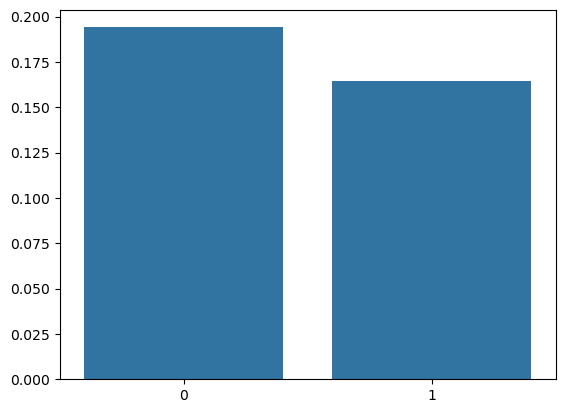

In [84]:
## We can plot the two prinicpal component variances
sns.barplot(pca.explained_variance_ratio_)

### We have performed PCA with 2 dimensions because we want to plot them in 2D, but you can ask for any number of PC's (as long as its less than the number of features)

<Axes: >

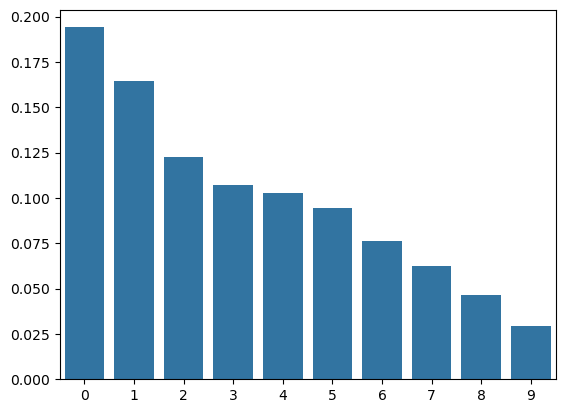

In [85]:
pca = PCA(n_components=10)

## Fit transform does the same as the two steps we used for the scaler - it just combines them into one line of code
pca_values = pca.fit_transform(df_scaled_pd)

sns.barplot(pca.explained_variance_ratio_)

In [55]:
#pca_values now contains two columns, one for each prinicpal component, and the order of the samples is the same as in our orginial data
pca_values

array([[ 0.98633987,  0.59686524],
       [-0.19228201,  1.60855778],
       [ 0.07987039,  0.57162413],
       [ 0.20649151, -0.39564672],
       [-2.73116021,  2.59834838],
       [-0.53417167,  2.29255548],
       [ 2.03723566,  3.73073493],
       [ 1.27114401,  0.78023583],
       [ 4.14000853,  1.1975148 ],
       [ 2.76557848, -0.49397222],
       [ 1.7173632 ,  2.13387793],
       [ 3.47642108, -0.05905611],
       [ 0.68022685,  0.7284578 ],
       [ 0.81653166,  1.88328983],
       [ 0.58320456,  1.72514162],
       [ 2.7593908 ,  0.10776687],
       [ 1.3719545 ,  0.31016798],
       [ 2.33477804, -0.17356295],
       [ 1.23565439,  0.7883437 ],
       [ 0.500687  ,  1.80824437],
       [ 0.54064103,  1.32683179],
       [ 0.41948742,  1.92731305],
       [ 2.14389294, -0.96396815],
       [ 0.42468858,  1.89900687],
       [ 2.07792655, -1.00722304],
       [ 0.38993136,  1.03100617],
       [ 2.80465398,  0.08729591],
       [ 1.924822  ,  2.04379006],
       [ 0.48819987,

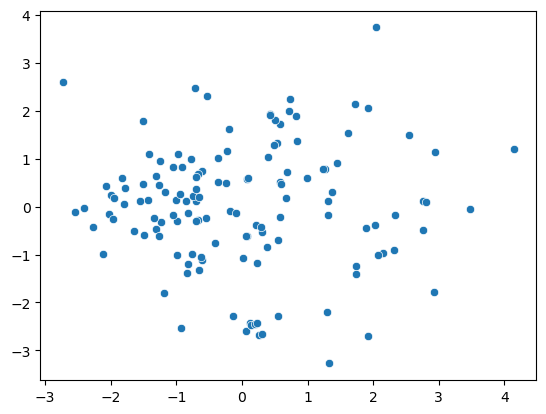

In [61]:
# We plot the PCA result. X_pca[:, 0] selects the first column from the array above.
# We could also convert the array to a pandas dataframe and plot it in the same way we have before
sns.scatterplot(x = pca_values[:, 0], y = pca_values[:, 1])
plt.show()

### Task 3: Colour the PCA plot by particle Release value - what do you see?

In [ ]:
# Insert code here

## A different dimensionality reduction method - Umap

In [77]:
import umap

## Umap is run in exactly the same way as PCA - we call the function, then we fit it to our data
umap_reducer = umap.UMAP(n_components=2, random_state=42) ## Random state refers to the random seed the alogrithm uses

X_umap = umap_reducer.fit_transform(df_scaled_pd)

/Users/davidshorthouse/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


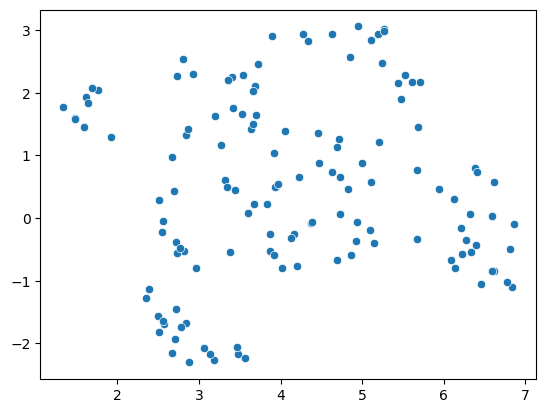

In [79]:
# We plot the umap in the same way as the PCA
sns.scatterplot(x = X_umap[:, 0], y = X_umap[:, 1])
plt.show()

### Task 4: Colour the umap scatterplot by the release, what do you see here?

In [ ]:
# Insert code here

# Clustering

Clustering analysis can be performed just as easily us dimensionality reduction - you essentially load the clustering algorithm, give it your data, then run it. There are numerous parameters that you can tweak however. For example - for K-means you can change the number of clusters you want to discover, and the starting point of the clusters.

In [105]:
from sklearn.cluster import KMeans

# KMeans clustering - n_clusters is the numer of clusters you are finding, random_state is the number that determines the starting point
kmeans = KMeans(n_clusters=3, random_state=42)

# For kmeans_labels 
kmeans_labels = kmeans.fit_predict(df_scaled_pd)

/Users/davidshorthouse/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [106]:
# kmeans returns you a list of numbers - this list is in the same order as the samples in the dataframe
# The value is which cluster that sample has been assigned to

print(kmeans_labels)

[2 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2
 0 2 0 1 2 0 0 1 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 1 0 0 1 1 0 1 0 1 2 1 0 2 2 2 1 2 1 0 0 0]


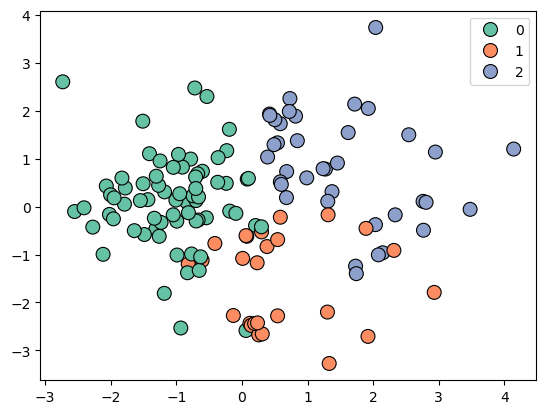

In [107]:
# PCA

# We plot the cluster assignments using the "hue" parameter of the scatterplot
sns.scatterplot(x = X_pca[:, 0], y = X_pca[:, 1], hue = kmeans_labels, palette = "Set2", s = 100, edgecolor = "black")
plt.show()

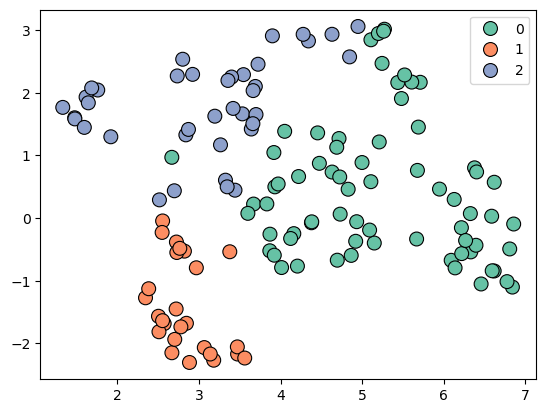

In [108]:
# UMAP

# We plot the cluster assignments using the "hue" parameter of the scatterplot
sns.scatterplot(x = X_umap[:, 0], y = X_umap[:, 1], hue = kmeans_labels, palette = "Set2", s = 100, edgecolor = "black")
plt.show()

### Task 5: Try changing the number of clusters and the random seed - plotting the cluster assignment on the UMAP

- How much does the random seed effect the results?
- How many clusters seems to be "correct"?


In [ ]:
# Insert code here

DBSCAN is like kmeans - but works through linking up data points that are near to each other:



DBScan is also extremely easy to use - but again, it has parameters that need to be tweaked for DBScan in particular the important parameters are:

- The minimum number of samples needed to define a "cluster" (min_samples)
- The radius around which you will look for other points (eps)

In [144]:
from sklearn.cluster import DBSCAN

# DBSCAN clustering
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled_pd)

In [145]:
## dbscan_labels is a list just like for kmeans
# In this case - the samples labelled as -1 are unclustered, i.e not involved in a group
print(dbscan_labels)

[-1 -1  0 -1 -1 -1 -1 -1 -1 -1  0  1 -1  0  0  1  0  1  0  0  0  0  1  0
  1 -1 -1 -1  0  1 -1 -1  1  0  0  0  0  0 -1 -1  0 -1  0  0 -1  0 -1 -1
  0 -1  0  0 -1 -1  0  0 -1  0 -1  0  0 -1  0  0  0  0 -1  0  0  0  0  0
 -1 -1 -1 -1 -1 -1  0 -1 -1  0 -1 -1  0 -1 -1  0  0  0 -1  0 -1 -1 -1  0
 -1  0  0  0 -1 -1  0 -1 -1 -1  0  0 -1  0 -1  0  0 -1 -1 -1  0  0  0  0
  0 -1  0  0 -1 -1 -1  0 -1 -1  0 -1  0]


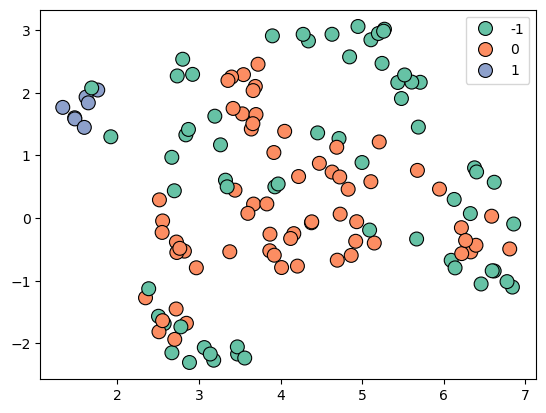

In [146]:
# We plot the cluster assignments using the "hue" parameter of the scatterplot
sns.scatterplot(x = X_umap[:, 0], y = X_umap[:, 1], hue = dbscan_labels, palette = "Set2", s = 100, edgecolor = "black")
plt.show()

### Task 6: Change the eps and min samples parameter - how does this influence the results?

In [147]:
## Insert code here

# Bonus: Assessing clustering analysis quantitively

There is a method for assessing how good clustering is called a _sillhouette score_ this metric indicates how similar the members of a cluster are compared to their neighbour clusters. A higher score is better. 

In [149]:
from sklearn.metrics import silhouette_score

# For example, evaluating KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled_pd)

silhouette = silhouette_score(df_scaled_pd, kmeans_labels)

/Users/davidshorthouse/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [150]:
print(silhouette)

0.145546710256935


### Bonus task: See if you can calculate the sillhouette score for a range of k means clustering values. Which one give the highest score and therefore is quantitatively the best?

In [ ]:
# Insert code here